# SuperEffective.gg Pokémon Dataset - Data Notebook

## Imports, constants and functions

In [1]:
## Imports

import pandas as pd
import numpy as np
import scipy
import functions as fn

## Load and clean-up data

In [2]:
## Load Data from original JSON dataset

raw_df = fn.load_json_datasource()
df = fn.cleanup_df(raw_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, bulbasaur to enamorus-therian
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type1    1409 non-null   object
 1   type2    696 non-null    object
 2   color    1409 non-null   object
 3   gen      1409 non-null   int64 
 4   region   1409 non-null   object
 5   is_form  1409 non-null   bool  
 6   hp       1409 non-null   int64 
 7   atk      1409 non-null   int64 
 8   def      1409 non-null   int64 
 9   spatk    1409 non-null   int64 
 10  spdef    1409 non-null   int64 
 11  speed    1409 non-null   int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 165.8+ KB


In [13]:
raw_df.query('hp < 0')

,type1,type2,color,gen,region,is_form,hp,atk,def,spatk,spdef,speed
id,,,,,,,,,,,,
sprigatito,grass,None,green,9,_titan_,False,-1,-1,-1,-1,-1,-1
fuecoco,fire,None,red,9,_titan_,False,-1,-1,-1,-1,-1,-1
quaxly,water,None,white,9,_titan_,False,-1,-1,-1,-1,-1,-1
pawmi,electric,None,orange,9,_titan_,False,-1,-1,-1,-1,-1,-1
lechonk,normal,None,black,9,_titan_,False,-1,-1,-1,-1,-1,-1
smoliv,grass,normal,green,9,_titan_,False,-1,-1,-1,-1,-1,-1
koraidon,dragon,fighting,red,9,_titan_,False,-1,-1,-1,-1,-1,-1
miraidon,dragon,electric,purple,9,_titan_,False,-1,-1,-1,-1,-1,-1


In [14]:
## Cleanup Data

# Remove rows with negative stats (not released pokemon)
df = raw_df.query('hp > 0')

# Normalize empty values
df.loc[df['type2'].isna(), ['type2']] = pd.NA

# Set missing color
df.loc['floette-eternal', ['color']] = 'black'

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, bulbasaur to enamorus-therian
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type1    1409 non-null   object
 1   type2    696 non-null    object
 2   color    1409 non-null   object
 3   gen      1409 non-null   int64 
 4   region   1409 non-null   object
 5   is_form  1409 non-null   bool  
 6   hp       1409 non-null   int64 
 7   atk      1409 non-null   int64 
 8   def      1409 non-null   int64 
 9   spatk    1409 non-null   int64 
 10  spdef    1409 non-null   int64 
 11  speed    1409 non-null   int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 165.8+ KB


In [15]:
df_normal = fn.flatten_types(df)
df_mean = df_normal.groupby('type').median().reset_index()
df_mean

,type,type_slot,gen,is_form,hp,atk,def,spatk,spdef,speed
0,bug,1.0,5.0,0.0,65.0,59.5,55.0,55.0,55.5,68.0
1,dark,1.0,5.0,0.0,70.0,92.0,65.0,70.0,65.0,77.0
2,dragon,1.0,6.0,0.0,80.0,100.0,90.0,96.0,85.0,85.0
3,electric,1.0,5.0,0.0,60.0,70.0,63.0,81.0,70.0,90.0
4,fairy,1.0,8.0,1.0,65.0,60.0,75.0,110.0,121.0,64.0
5,fighting,1.0,5.0,0.0,75.5,105.0,75.0,63.0,70.0,77.5
6,fire,1.0,5.0,0.0,70.0,84.0,65.0,87.5,70.0,78.5
7,flying,2.0,5.0,0.0,75.0,76.0,60.0,85.0,65.0,89.0
8,ghost,1.0,6.0,0.0,60.0,75.0,75.0,85.0,80.0,70.0
9,grass,1.0,5.0,0.0,70.0,75.0,70.0,70.0,75.0,60.0


<AxesSubplot:title={'center':'Speed'}, xlabel='type', ylabel='speed'>

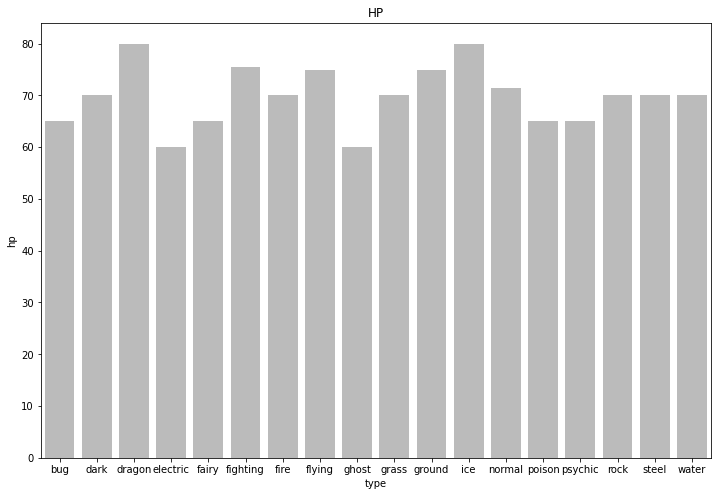

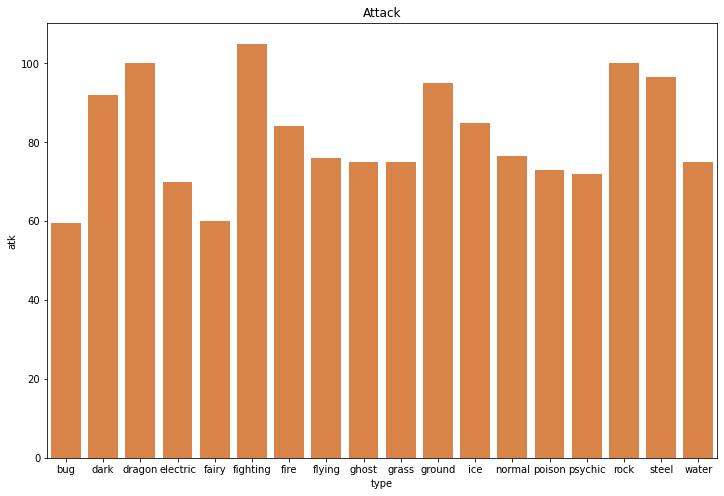

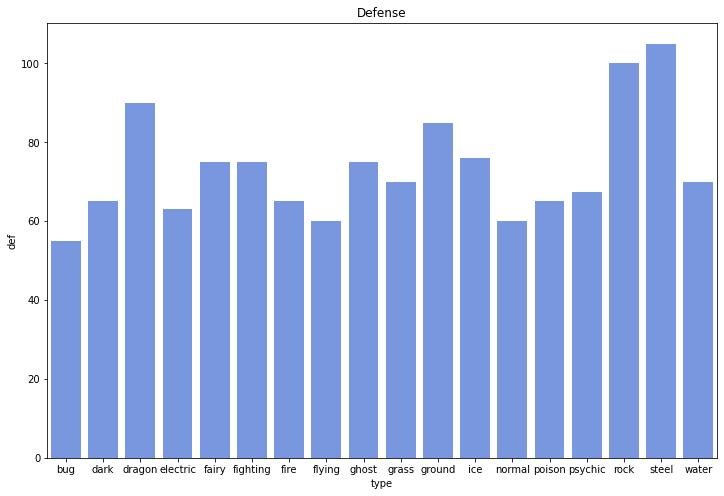

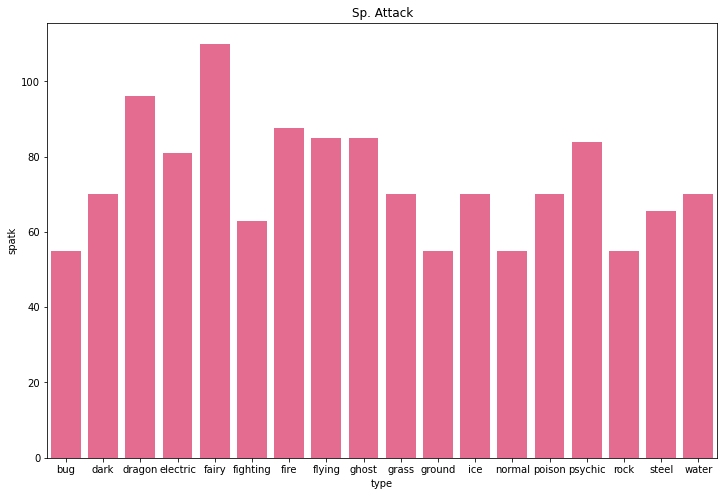

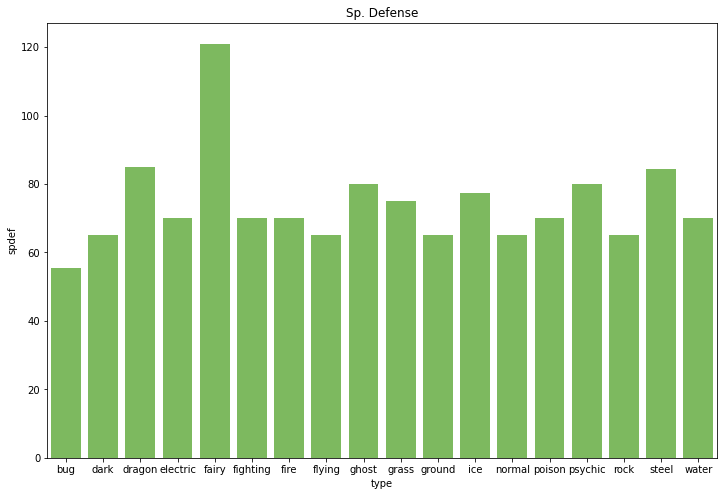

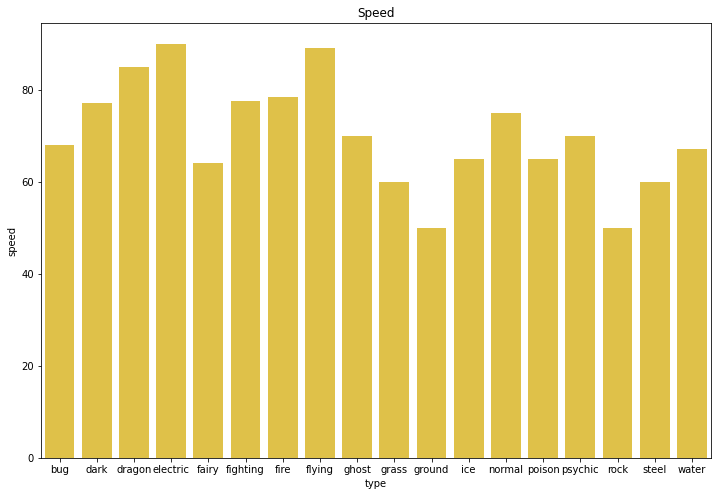

In [16]:
# sns.barplot(data=df_mean, x="type1", y="base_hp", hue='type1')

plt.subplots(figsize=(12,8))
plt.title("HP")
ax = sns.barplot(data=df_mean, x="type", y="hp", color="#bbb")
ax

plt.subplots(figsize=(12,8))
plt.title("Attack")
ax = sns.barplot(data=df_mean, x="type", y="atk", color="#F08030")
ax

plt.subplots(figsize=(12,8))
plt.title("Defense")
ax = sns.barplot(data=df_mean, x="type", y="def", color="#6890F0")
ax

plt.subplots(figsize=(12,8))
plt.title("Sp. Attack")
ax = sns.barplot(data=df_mean, x="type", y="spatk", color="#F85888")
ax

plt.subplots(figsize=(12,8))
plt.title("Sp. Defense")
ax = sns.barplot(data=df_mean, x="type", y="spdef", color="#78C850")
ax

plt.subplots(figsize=(12,8))
plt.title("Speed")
ax = sns.barplot(data=df_mean, x="type", y="speed", color="#F8D030")
ax

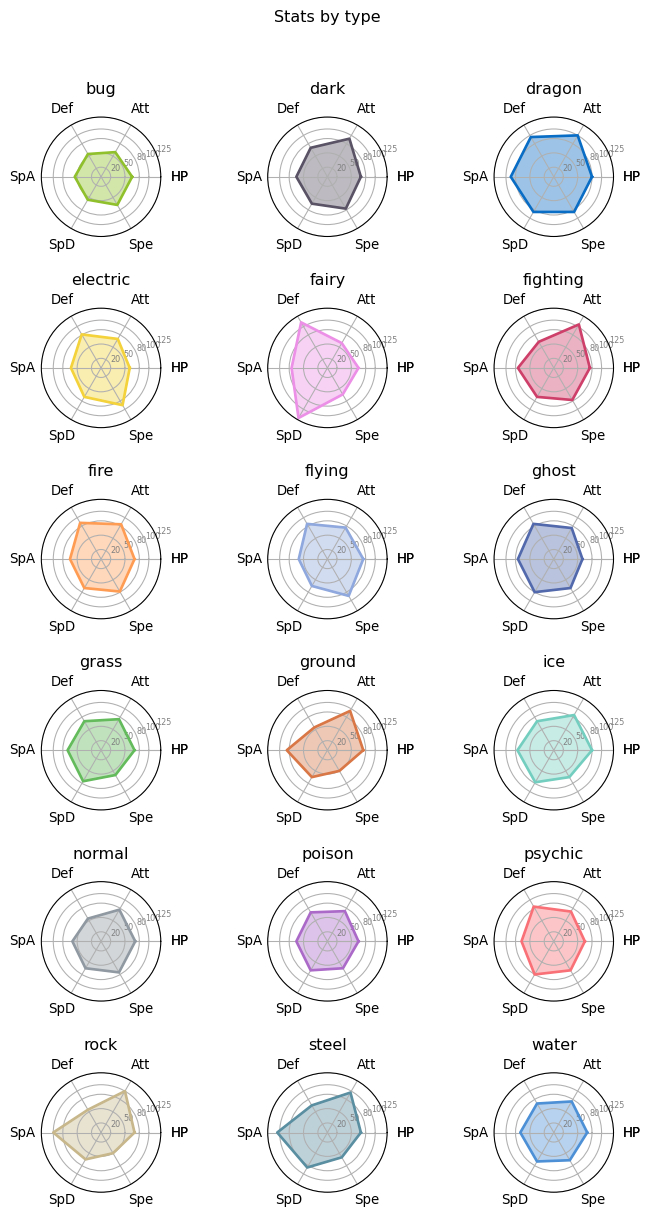

In [17]:
attributes=['hp', 'atk', 'spatk', 'def', 'spdef', 'speed'] # df_mean.columns.tolist()
attribute_labels = ['HP', 'Att', 'Def', 'SpA', 'SpD', 'Spe']
types = df_mean['type'].values.tolist()
types_palette = {
    'bug': '#90C12C',
    'dark': '#5A5366',
    'dragon': '#0A6DC5',
    'electric': '#F3D23B',
    'fairy': '#EC8FE6',
    'fighting': '#CE4069',
    'fire': '#FF9C54',
    'flying': '#8FA8DD',
    'ghost': '#5269AC',
    'grass': '#63BB5B',
    'ground': '#D97746',
    'ice': '#74CEC0',
    'normal': '#9099A1',
    'psychic': '#F97176',
    'poison': '#AB6AC8',
    'rock': '#C7B78B',
    'steel': '#5A8EA1',
    'water': '#4D90D5',
    
}

def draw_radar_charts_all(df, attributes, types, types_palette):
    radar_attributes = [*attributes, attributes[0]]
    attribute_labels2 = [*attribute_labels, attribute_labels[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(radar_attributes))    

    
    # 3 x 6 = 18 plots, which should be equal to len(types)
    fig, axs = plt.subplots(6, 3, figsize=(8, 14), dpi=96, subplot_kw=dict(projection='polar'))
    fig.suptitle('Stats by type')
    #fig.tight_layout() # improves spacing
    
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    
    
    axs_flat = []
    for i in range(0, len(axs)):
        for j in range(0, len(axs[i])):
            axs_flat.append(axs[i][j])
            
    for i in range(0, len(types)):
        color = types_palette[types[i]]
        pkm_type = types[i]
        ax = axs_flat[i]
    
        type_data = df.query(f'type=="{pkm_type}"')[attributes].values.tolist()[0]
        type_data = [*type_data, type_data[0]]
        
        ax.set_title(pkm_type)
        # lines, labels = ax.thetagrids(np.degrees(label_loc), labels=radar_attributes)
        
        ax.plot(label_loc, type_data, color=color, linewidth=2, linestyle='solid')
        ax.fill(label_loc, type_data, color=color, alpha=0.4)
        
        ax.set_yticks([20,50,80,100,125], ["20","50","80","100","125"], color="gray", size=6)
        ax.set_ylim(0,125)
        ax.set_xticks(label_loc)
        ax.set_xticklabels(attribute_labels2)
        # ax.label_outer()
    
    # plt.title(f'Stats for type "{pkm_type}"', size=20, y=1.05)
    # ax.legend()
    plt.show()
    
draw_radar_charts_all(df_mean, attributes, types, types_palette)